# Clustering: Ejemplo k-means


- Objetivo es agrupar las diferentes observaciones en el dataset, sin tener en cuenta la variable Y
- Útil para crear nuevas variables para futuros modelos

In [ ]:
# Cargamos diferentes paquetes
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


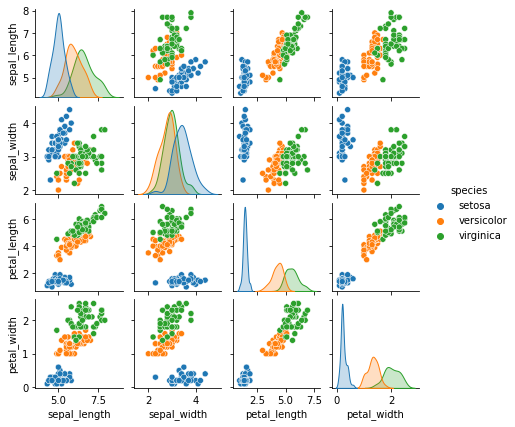

In [ ]:
sns.pairplot(iris, hue='species', size=1.5);

## Ajuste del clustering a los datos

In [ ]:
# Data Preprocess
X = iris.drop('species', axis=1)
y = pd.DataFrame(iris['species'])
print(X.head())
print("---------------")
print(y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
---------------
  species
0  setosa
1  setosa
2  setosa
3  setosa
4  setosa


In [ ]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

# De la clase KMeans, crea el objeto clustering 
clustering = KMeans(n_clusters=3, random_state= 5)
# Ajuste
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

In [ ]:
# Output, asignación del cluster de cada variable
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
km_labels = pd.DataFrame(clustering.labels_)
km_labels.columns = ["KM"]
km_labels.head()

,KM
0,1
1,1
2,1
3,1
4,1


In [ ]:
iris_km = pd.concat([iris, km_labels], axis=1)
print(iris_km.dtypes)
iris_km.head()

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
KM                int32
dtype: object


,sepal_length,sepal_width,petal_length,petal_width,species,KM
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
iris_km['species_num'] = LE.fit_transform(iris_km['species'])

In [ ]:
iris_km.describe()

,sepal_length,sepal_width,petal_length,petal_width,KM,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.840000,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.803349,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,1.750000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000


In [ ]:
iris_km.head()

,sepal_length,sepal_width,petal_length,petal_width,species,KM,species_num
0,5.1,3.5,1.4,0.2,setosa,1,0
1,4.9,3.0,1.4,0.2,setosa,1,0
2,4.7,3.2,1.3,0.2,setosa,1,0
3,4.6,3.1,1.5,0.2,setosa,1,0
4,5.0,3.6,1.4,0.2,setosa,1,0


In [ ]:
iris_km[['species',"KM"]][5:10]

,species,KM
5,setosa,1
6,setosa,1
7,setosa,1
8,setosa,1
9,setosa,1


In [ ]:
iris_km[['species',"KM"]].value_counts()

species     KM
setosa      1     50
versicolor  0     48
virginica   2     36
            0     14
versicolor  2      2
dtype: int64

Text(0.5, 1.0, 'K-means classification')

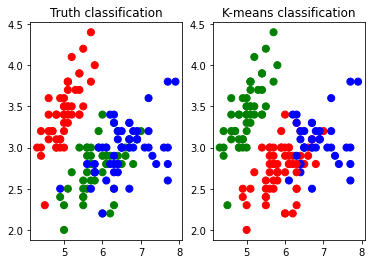

In [ ]:
color_theme = np.array(['r','g','b'])
plt.subplot(1,2,1)

plt.scatter(x=iris_km['sepal_length'], y=iris_km['sepal_width'], c= color_theme[iris_km['species_num']], s=50)
plt.title('Truth classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_km['sepal_length'], y=iris_km['sepal_width'], c= color_theme[iris_km['KM']], s=50)
plt.title('K-means classification')


## Selección del número óptimo K?

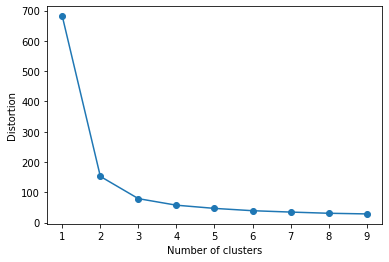

In [ ]:
distortions = []
for i in range(1, 10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# PCA

Iris Dataset

In [ ]:
from sklearn.decomposition import PCA  # 1. Importamos la clase
model = PCA(n_components=2)            # 2. Elegimos los parámetos
model.fit(X)                           # 3. Ajustamos el dato
X_2D = model.transform(X)              # 4. Transformamos el dato

In [ ]:
model.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Now let's plot the results. A quick way to do this is to insert the results into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


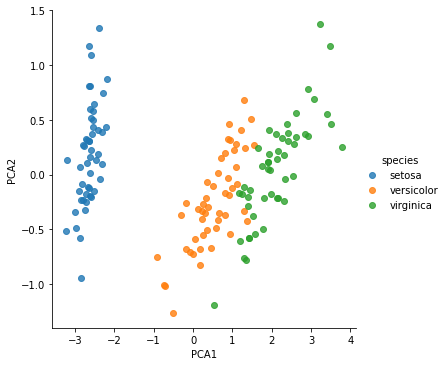

In [ ]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


In [ ]:
# Podrías aplicar el cluster k means sobre las dos dimensiones del PCA?

# De la clase KMeans, crea el objeto clustering 
clustering_2= KMeans(n_clusters=3, random_state= 5)
# Ajuste
# clustering_2.fit(.......)

# Output, asignación del cluster de cada variable


# Creamos la nueva columna



# Haz una comparación como la de value_counts
## Original
print(iris_km[['species',"KM"]].value_counts())

## Nueva




species     KM
setosa      1     50
versicolor  0     48
virginica   2     36
            0     14
versicolor  2      2
dtype: int64
species     KM_PCA
setosa      1         50
versicolor  0         47
virginica   2         36
            0         14
versicolor  2          3
dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,KM_PCA
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1


species     KM
setosa      1     50
versicolor  0     48
virginica   2     36
            0     14
versicolor  2      2
dtype: int64
species     KM_PCA
setosa      1         50
versicolor  0         47
virginica   2         36
            0         14
versicolor  2          3
dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,KM_PCA
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1


# Algoritmos no supervisados

En este notebook trataremos:

- k-Means
- PCA

In [ ]:
# Importamos las diferentes librerías
## Nombre de la librería y alias que le ponemos en nuestro notebook
## Los alias con las que las importamos suelen ser muy estandares

# Importar y manipular datos
import pandas as pd

# Graficar datos
import seaborn as sns
import matplotlib.pyplot as plt

# Algebra 
import numpy as np

# Cargamos 
df = pd.read_csv('https://raw.githubusercontent.com/carlosbort/datasets/master/bank_churn/telecom_churn.csv')
df.head() # Cogemos las primeras 5 filas


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# k-Means

Objetivo: poder clasificar los diferentes puntos

In [ ]:
# Escalar las variables
from sklearn.preprocessing import scale
from sklearn import datasets
from sklearn.cluster import KMeans

#iris = datasets.load_iris()
#X = scale(iris.data)
#y= pd.DataFrame(iris.target)


In [ ]:
df_num = df.select_dtypes(include=['int64','float64'])
X = scale(df_num)
y= df['Churn'].astype('int64')

In [ ]:
df_num.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
clustering = KMeans(n_clusters=2, random_state= 5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

Plot classification

In [ ]:
clustering.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

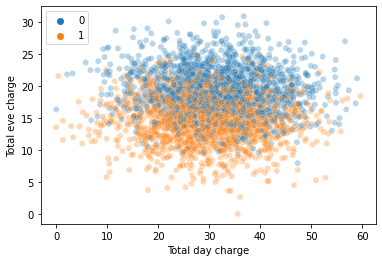

In [ ]:
sns.scatterplot(x='Total day charge', y='Total eve charge', hue=clustering.labels_, alpha =0.3, data=df_num)

### Ejercicio

**Visual** 

- Explora como ha clasificado para las siguientes dimensiones el algoritmo de k-Means

**Modelado**

- Con el script anterior, explora encontrar k= 3,5 y 7 cluster
- Visualiza alguno de ellos
- De tu objeto `clustering` mira el atributo `cluster_centers_`. Print por pantalla

In [ ]:
# Visual
## Explora como ha clasificado para las siguientes dimensiones el algoritmo de k-Means

# Modelado
## Con el script anterior, explora encontrar k= 3,5 y 7 cluster
## Visualiza alguno de ellos
## De tu objeto `clustering` mira el atributo `cluster_centers_`
### Haz print de ello




#### "Modelado"

Cómo clasificaría si este algoritmo de clustering lo utilizaramos como predictor

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
relabel = np.choose(clustering.labels_,[1,0]).astype(np.int64)
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       0.87      0.52      0.65      2850
           1       0.16      0.56      0.25       483

    accuracy                           0.52      3333
   macro avg       0.52      0.54      0.45      3333
weighted avg       0.77      0.52      0.59      3333



No clasificaría muy bien....

Pero, ¿cuantos clusters hay?

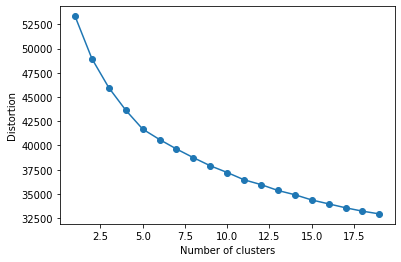

In [ ]:
distortions = []
for i in range(1, 20):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# PCA

Reconvertir las diferentes dimensiones del problema:
- Ortogonales entre ellas
- De mayor a menor varianza

In [ ]:
df_num = df.select_dtypes(include=['int64','float64'])
X = scale(df_num)
y= df['Churn'].astype('int64')

In [ ]:
from sklearn.decomposition import PCA
pca_df = PCA(n_components=2)
principalComponents_df = pca_df.fit_transform(X)

In [ ]:
principal_df = pd.DataFrame(data = principalComponents_df
             , columns = ['principal component 1', 'principal component 2'])
principal_df.tail()

,principal component 1,principal component 2
3328,0.799620,1.180114
3329,0.468751,0.506848
3330,-0.765078,-1.976412
3331,1.216285,-0.463565
3332,0.447621,-0.792832


In [ ]:
print('Explained variation per principal component: {}'.format(pca_df.explained_variance_ratio_))

Explained variation per principal component: [0.12786124 0.12675955]


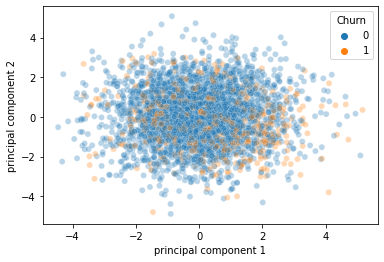

In [ ]:
sns.scatterplot(x='principal component 1', y='principal component 2', hue=y, alpha =0.3, data=principal_df)

### Ejercicio PCA

Repite con 3 componentes y plotea la dimension 1 con la 3


Explained variation per principal component: [0.12786124 0.12675955 0.12422051]


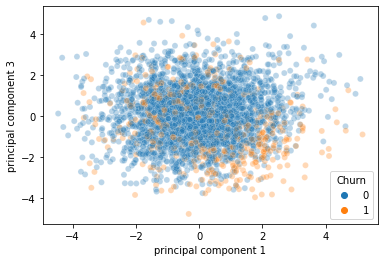

In [ ]:
from sklearn.decomposition import PCA
pca_iris = PCA(n_components=3)
principalComponents_iris = pca_iris.fit_transform(X)

principal_df = pd.DataFrame(data = principalComponents_iris
             , columns = ['principal component 1', 'principal component 2', 
                          'principal component 3'])
principal_df.tail()

print('Explained variation per principal component: {}'.format(pca_iris.explained_variance_ratio_))

sns.scatterplot(x='principal component 1', y='principal component 3', hue=y, alpha =0.3, data=principal_df)

Más ejemplos de reducción de dimensión

[PCA t-sne UMAP](https://youtu.be/YPJQydzTLwQ)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# HOMEWORK